<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/AirlinesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Lets import the libraries and input data file***

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  

df = pd.read_csv('/content/data_sof.csv')
df

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
0,19393,10821,1082103,30852,14122,1412202,30198,0.0
1,19393,10821,1082103,30852,14122,1412202,30198,1.0
2,19393,10821,1082103,30852,14122,1412202,30198,11.0
3,19393,10821,1082103,30852,14122,1412202,30198,29.0
4,19393,10821,1082103,30852,14307,1430702,30721,0.0
...,...,...,...,...,...,...,...,...
140808,19790,11433,1143302,31295,11057,1105703,31057,0.0
140809,19790,11057,1105703,31057,11433,1143302,31295,0.0
140810,19790,12892,1289203,32575,12889,1288903,32211,123.0
140811,19790,10397,1039705,30397,12451,1245102,31136,11.0


In [ ]:
df.info

<bound method DataFrame.info of         OP_CARRIER_AIRLINE_ID  ...  DEP_DELAY_NEW
0                       19393  ...            0.0
1                       19393  ...            1.0
2                       19393  ...           11.0
3                       19393  ...           29.0
4                       19393  ...            0.0
...                       ...  ...            ...
442617                  21171  ...            0.0
442618                  21171  ...            0.0
442619                  21171  ...            0.0
442620                  21171  ...            0.0
442621                  21171  ...            NaN

[442622 rows x 8 columns]>

In [ ]:
df.shape

(445827, 8)

In [ ]:
df.columns

Index(['OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEP_DELAY_NEW'],
      dtype='object')

***Lets find the null values, if any, in data set***

In [ ]:
# TO FIND OUT TOTAL NUMBER OF NULL VALUES IN EVERY COLUMN 

In [ ]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

DEP_DELAY_NEW    11473
dtype: int64

In [ ]:
df.isnull().sum()

OP_CARRIER_AIRLINE_ID        0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEP_DELAY_NEW            11473
dtype: int64

In [ ]:
# There is only one column DEP_DELAY_NEW which has 11473 nulls 

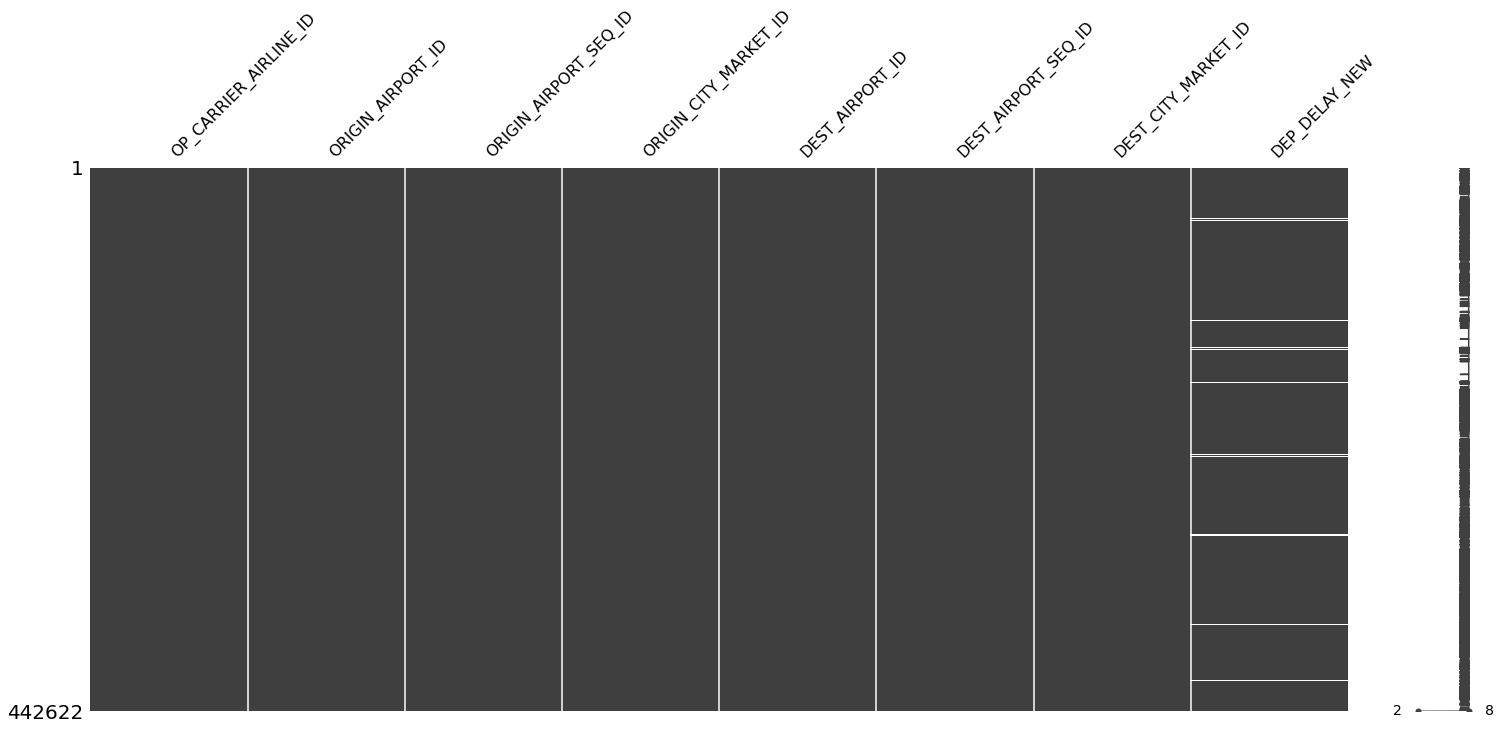

In [ ]:
%matplotlib inline
import missingno as msno
msno.matrix(df)

***White lines indicate missing values - This visualization is helpful when more than one columns have missing values. This helps to check if missing values in those columns are from same rows***

In [ ]:
# TO FIND EVERY ROW THAT HAS ATLEAST ONE NULL 

In [ ]:
df[df.isnull().any(axis = 1)][null_columns]

,DEP_DELAY_NEW
192,NaN
344,NaN
532,NaN
687,NaN
2059,NaN
...,...
445189,NaN
445200,NaN
445212,NaN
445240,NaN


***Cleaning the data - getting rid of null values***

In [ ]:
# DROP ROWS WITH THE MISSING VALUES

In [ ]:
dff = df.dropna()
dff

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
0,19393,10821,1082103,30852,14122,1412202,30198,0.0
1,19393,10821,1082103,30852,14122,1412202,30198,1.0
2,19393,10821,1082103,30852,14122,1412202,30198,11.0
3,19393,10821,1082103,30852,14122,1412202,30198,29.0
4,19393,10821,1082103,30852,14307,1430702,30721,0.0
...,...,...,...,...,...,...,...,...
445822,21171,12892,1289203,32575,11259,1125903,30194,0.0
445823,21171,11259,1125903,30194,12892,1289203,32575,8.0
445824,21171,12892,1289203,32575,11259,1125903,30194,0.0
445825,21171,11259,1125903,30194,12892,1289203,32575,0.0


*** TO REMOVE All origin airports that have less than 5 airlines***

In [ ]:
# MINIMUM IN EACH COLUMN DISPLAYED

In [ ]:
dff.min()

OP_CARRIER_AIRLINE_ID      19393.0
ORIGIN_AIRPORT_ID          10135.0
ORIGIN_AIRPORT_SEQ_ID    1013503.0
ORIGIN_CITY_MARKET_ID      30070.0
DEST_AIRPORT_ID            10135.0
DEST_AIRPORT_SEQ_ID      1013503.0
DEST_CITY_MARKET_ID        30070.0
DEP_DELAY_NEW                  0.0
dtype: float64

In [ ]:
#LENGTH OF UNIQUE ENTRY IN ONE PARTICULATR COLUMN i.e. NO REPETITION OF ENTRY 

In [ ]:
len(dff['ORIGIN_AIRPORT_ID'].unique())

294

In [ ]:
# NAME/ID OF EACH UNIQUE ENTRY IN THAT PARTICULAR COLUMN 

In [ ]:
dff['ORIGIN_AIRPORT_ID'].unique()

array([10821, 10874, 10994, 11042, 11057, 11066, 11140, 11259, 11267,
       11278, 11292, 14321, 14492, 14524, 14570, 14576, 14635, 14679,
       14683, 14730, 14747, 14771, 14831, 14843, 14869, 14893, 14908,
       15016, 15304, 15370, 15376, 10140, 10257, 10279, 10397, 10423,
       13232, 13244, 13296, 13342, 13487, 13495, 13158, 13198, 11697,
       11721, 11884, 11986, 11996, 12191, 12206, 12264, 12278, 12339,
       12391, 12451, 12889, 12892, 12896, 12953, 12992, 13204, 10693,
       10713, 10721, 10792, 10800, 11423, 11433, 11481, 11540, 11618,
       13796, 13851, 13871, 13891, 13931, 14027, 14057, 14100, 14107,
       14122, 14193, 14307, 10529, 10599, 12982, 12173, 13830, 12402,
       12758, 14222, 12478, 11995, 11775, 12266, 14986, 11503, 11193,
       11641, 10620, 13930, 13485, 15249, 11298, 15323, 12448, 15412,
       13303, 10431, 14685, 12217, 14783, 13360, 13486, 15024, 14814,
       10208, 15096, 10299, 11624, 10408, 11109, 13230, 11953, 12441,
       10868, 11252,

In [ ]:
# TOTAL COUNT OF EACH OF THE UNIQUE ENTRY IN THAT PARTICULAR COLUMN 

In [ ]:
# IF YOU ADD COUNTS OF EACH UNIQUE ENTRY, IT WILL SUM UPTO TOTAL NUMBER 434354

In [ ]:
pd.set_option('display.max_rows', 500) 
dff['ORIGIN_AIRPORT_ID'].value_counts()

10397    29465
13930    18269
11292    17325
11298    16344
12892    16131
14107    12871
14771    12794
12889    11988
12266    11504
13204    10466
14747     9674
13487     9493
11433     9321
10721     8814
14869     8640
11057     8625
11618     7704
12478     7552
12953     7487
11697     7452
10821     6550
13232     6536
14679     5911
13303     5906
15304     5856
11278     5840
11259     5727
14100     5319
12191     4473
15016     4250
14057     4103
12173     3860
10693     3731
13796     3605
10423     3542
13495     3461
14908     3423
13198     3264
14635     3219
14831     3179
14893     3119
13342     2664
11042     2616
14492     2398
14843     2349
14027     2327
14683     2324
12264     2290
12339     2163
13830     1905
14122     1853
11066     1745
10800     1723
13891     1574
10529     1484
12451     1455
10140     1432
15376     1409
13871     1392
13851     1315
10792     1252
11193     1230
10299     1223
15370     1192
10713     1164
13244     1120
14524     

In [ ]:
# CONCLUSION - AS SHOWN ABOVE, AIRPORT ID = 14588 & 15497 HAVE ENTRIES LESS THAN 5 - 4 AND 3 RESPECTIVELY
# LETS GET RID OF THESE 

In [ ]:
df['OP_CARRIER_AIRLINE_ID'].nunique()

3

In [ ]:
i = dff[(dff.ORIGIN_AIRPORT_ID == 15497)].index
i

Int64Index([435124, 438011, 439699], dtype='int64')

In [ ]:
# 3 ROWS AS ABOVE

In [ ]:
j = dff[(dff.ORIGIN_AIRPORT_ID == 14588)].index
j

Int64Index([388838, 388839, 388840, 388841], dtype='int64')

In [ ]:
# 4 ROWS AS ABOVE

In [ ]:
df_1 = dff.drop(i)
df_2 = df_1.drop(j)

df_2

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
0,19393,10821,1082103,30852,14122,1412202,30198,0.0
1,19393,10821,1082103,30852,14122,1412202,30198,1.0
2,19393,10821,1082103,30852,14122,1412202,30198,11.0
3,19393,10821,1082103,30852,14122,1412202,30198,29.0
4,19393,10821,1082103,30852,14307,1430702,30721,0.0
...,...,...,...,...,...,...,...,...
445822,21171,12892,1289203,32575,11259,1125903,30194,0.0
445823,21171,11259,1125903,30194,12892,1289203,32575,8.0
445824,21171,12892,1289203,32575,11259,1125903,30194,0.0
445825,21171,11259,1125903,30194,12892,1289203,32575,0.0


In [ ]:
# 434354 - 7 rows as above = 434347 

***TO LIST the code of the airlines most at fault in the origin airports that exceed the 90th percentile of
overall delays in 2016 for the month of January***

In [ ]:
# 90th PERCENTILE - IF VALUE n IS AT THE 90TH PERCENTILE, THEN n IS GREATER THAN k% OF THE VALUES USED IN THE SET

In [ ]:
df_2.quantile(.9)

OP_CARRIER_AIRLINE_ID      20409.0
ORIGIN_AIRPORT_ID          14771.0
ORIGIN_AIRPORT_SEQ_ID    1477102.0
ORIGIN_CITY_MARKET_ID      33570.0
DEST_AIRPORT_ID            14771.0
DEST_AIRPORT_SEQ_ID      1477102.0
DEST_CITY_MARKET_ID        33570.0
DEP_DELAY_NEW                 29.0
Name: 0.9, dtype: float64

In [ ]:
k = df_2[(df_2.DEP_DELAY_NEW > 29)].index
k

Int64Index([    13,     16,     19,     28,     29,     32,     35,     38,
                41,     42,
            ...
            445667, 445687, 445749, 445755, 445760, 445763, 445765, 445776,
            445806, 445808],
           dtype='int64', length=43121)

In [ ]:
data = df_2.loc[df_2['DEP_DELAY_NEW'] > 29]
data

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
13,19393,10821,1082103,30852,14321,1432103,34321,79.0
16,19393,10821,1082103,30852,14492,1449202,34492,30.0
19,19393,10821,1082103,30852,14492,1449202,34492,35.0
28,19393,10821,1082103,30852,14635,1463502,31714,64.0
29,19393,10821,1082103,30852,14679,1467903,33570,101.0
...,...,...,...,...,...,...,...,...
445763,21171,13830,1383002,33830,14771,1477102,32457,79.0
445765,21171,12889,1288903,32211,12892,1289203,32575,80.0
445776,21171,12264,1226402,30852,14771,1477102,32457,41.0
445806,21171,12889,1288903,32211,11259,1125903,30194,31.0


In [ ]:
df_3 = df_2[df_2['DEP_DELAY_NEW'] > 29][['OP_CARRIER_AIRLINE_ID','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID', 'DEP_DELAY_NEW']]
df_3

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY_NEW
13,19393,10821,14321,79.0
16,19393,10821,14492,30.0
19,19393,10821,14492,35.0
28,19393,10821,14635,64.0
29,19393,10821,14679,101.0
...,...,...,...,...
445763,21171,13830,14771,79.0
445765,21171,12889,12892,80.0
445776,21171,12264,14771,41.0
445806,21171,12889,11259,31.0


In [ ]:
delay_total = df_2['DEP_DELAY_NEW'].sum()
delay_total

4679963.0

In [ ]:
delay_ninety = df_3['DEP_DELAY_NEW'].sum()
delay_ninety

3638619.0

In [ ]:
percentage = delay_ninety/delay_total
percentage

0.777488839121164

In [ ]:
df_4 = df_3.head(100)

***VISUALISATIONS***

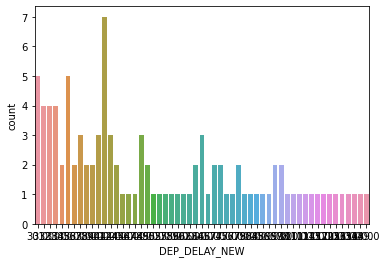

In [ ]:
#Season with most number of matches(VISUALIZATION)
sns.countplot(x='DEP_DELAY_NEW', data=df_4)
plt.show()

In [ ]:
import pandas as pd 

df = pd.read_csv('/content/Sof_JanData.csv')
df

,YEAR,MONTH,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 25
0,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1436.0,21.0,21.0,1.0,1700.0,15.0,15.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,NaN
1,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1414.0,-1.0,0.0,0.0,1642.0,-3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1441.0,26.0,26.0,1.0,1709.0,24.0,24.0,1.0,0.0,0.0,18.0,0.0,0.0,0.0,6.0,NaN
3,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1446.0,31.0,31.0,1.0,1737.0,52.0,52.0,1.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,NaN
4,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1414.0,-1.0,0.0,0.0,1652.0,7.0,7.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445822,2016,1,15376,1537602,30436,TUS,12892,1289203,32575,LAX,1305.0,0.0,0.0,0.0,1420.0,40.0,40.0,1.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,NaN
445823,2016,1,15376,1537602,30436,TUS,12892,1289203,32575,LAX,1947.0,17.0,17.0,1.0,2026.0,26.0,26.0,1.0,0.0,0.0,5.0,0.0,9.0,0.0,12.0,NaN
445824,2016,1,15376,1537602,30436,TUS,13232,1323202,30977,MDW,827.0,37.0,37.0,1.0,1238.0,28.0,28.0,1.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,NaN
445825,2016,1,15376,1537602,30436,TUS,14679,1467903,33570,SAN,1427.0,-3.0,0.0,0.0,1509.0,24.0,24.0,1.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,NaN


In [ ]:
df.shape

(445827, 26)

In [ ]:
df.info

<bound method DataFrame.info of         YEAR  MONTH  ...  LATE_AIRCRAFT_DELAY  Unnamed: 25
0       2016      1  ...                  0.0          NaN
1       2016      1  ...                  NaN          NaN
2       2016      1  ...                  6.0          NaN
3       2016      1  ...                  0.0          NaN
4       2016      1  ...                  NaN          NaN
...      ...    ...  ...                  ...          ...
445822  2016      1  ...                  0.0          NaN
445823  2016      1  ...                 12.0          NaN
445824  2016      1  ...                  0.0          NaN
445825  2016      1  ...                  0.0          NaN
445826  2016      1  ...                  0.0          NaN

[445827 rows x 26 columns]>

In [ ]:
df.isna().sum()

YEAR                          0
MONTH                         0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN_CITY_MARKET_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST_CITY_MARKET_ID           0
DEST                          0
DEP_TIME                  11473
DEP_DELAY                 11473
DEP_DELAY_NEW             11473
DEP_DEL15                 11473
ARR_TIME                  11907
ARR_DELAY                 12529
ARR_DELAY_NEW             12529
ARR_DEL15                 12529
CANCELLED                     0
DIVERTED                      0
CARRIER_DELAY            374945
WEATHER_DELAY            374945
NAS_DELAY                374945
SECURITY_DELAY           374945
LATE_AIRCRAFT_DELAY      374945
Unnamed: 25              445827
dtype: int64

In [ ]:
del df["Unnamed: 25"]

***PROJECT - 2***

In [ ]:
df

,YEAR,MONTH,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,DIVERTED
0,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1436.0,21.0,21.0,1.0,1700.0,15.0,15.0,1.0,0.0,0.0
1,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1414.0,-1.0,0.0,0.0,1642.0,-3.0,0.0,0.0,0.0,0.0
2,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1441.0,26.0,26.0,1.0,1709.0,24.0,24.0,1.0,0.0,0.0
3,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1446.0,31.0,31.0,1.0,1737.0,52.0,52.0,1.0,0.0,0.0
4,2016,1,13303,1330303,32467,MIA,11278,1127803,30852,DCA,1414.0,-1.0,0.0,0.0,1652.0,7.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445822,2016,1,15376,1537602,30436,TUS,12892,1289203,32575,LAX,1305.0,0.0,0.0,0.0,1420.0,40.0,40.0,1.0,0.0,0.0
445823,2016,1,15376,1537602,30436,TUS,12892,1289203,32575,LAX,1947.0,17.0,17.0,1.0,2026.0,26.0,26.0,1.0,0.0,0.0
445824,2016,1,15376,1537602,30436,TUS,13232,1323202,30977,MDW,827.0,37.0,37.0,1.0,1238.0,28.0,28.0,1.0,0.0,0.0
445825,2016,1,15376,1537602,30436,TUS,14679,1467903,33570,SAN,1427.0,-3.0,0.0,0.0,1509.0,24.0,24.0,1.0,0.0,0.0


***TASK - Lets find the missing values***

In [ ]:
df.isna().sum()

YEAR                         0
MONTH                        0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEST                         0
DEP_TIME                 11473
DEP_DELAY                11473
DEP_DELAY_NEW            11473
DEP_DEL15                11473
ARR_TIME                 11907
ARR_DELAY                12529
ARR_DELAY_NEW            12529
ARR_DEL15                12529
CANCELLED                    0
DIVERTED                     0
dtype: int64

***We have missing values in 8 columns. The missing values in all DEP columns are the same. But, the missing values in ARR columns are mostly same. Lets confirm it by a visualization.***

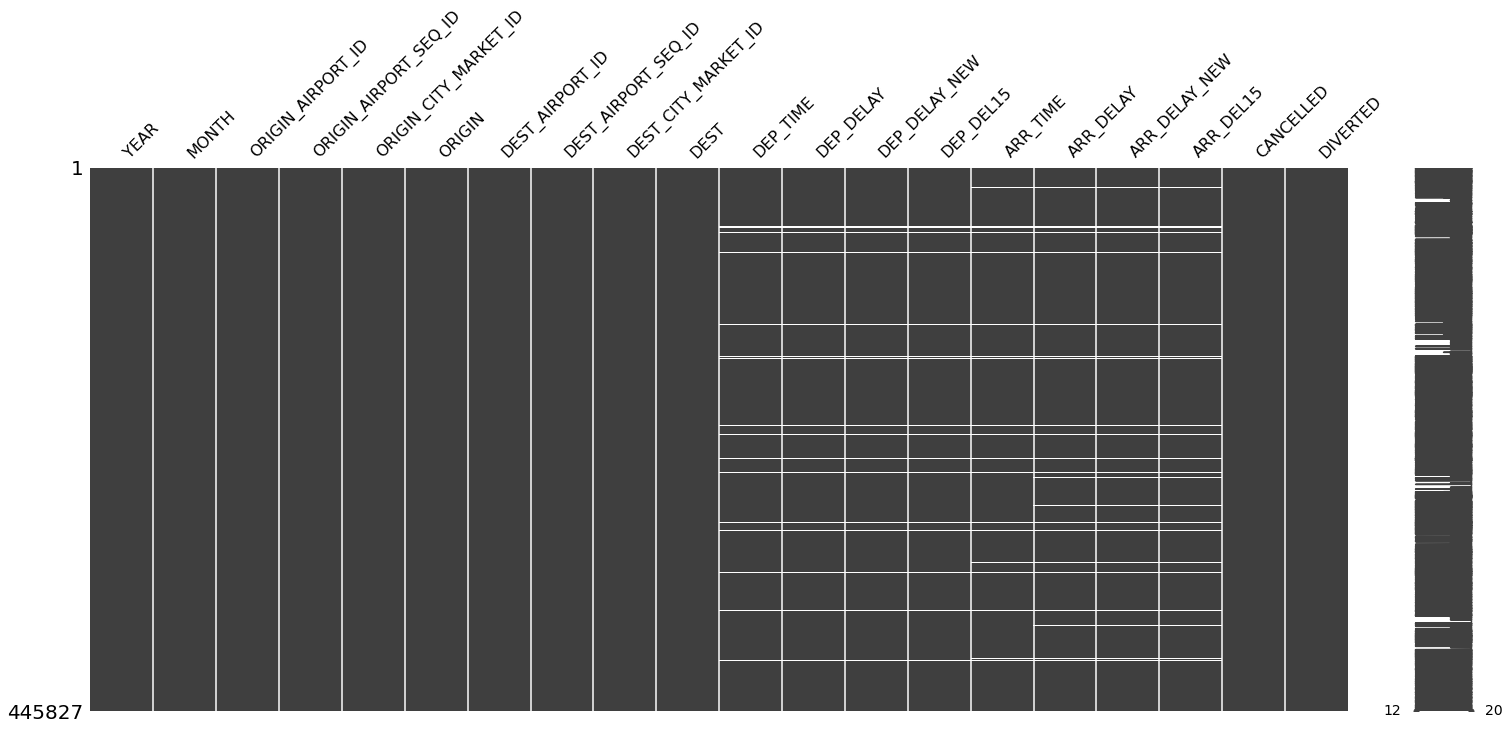

In [ ]:
%matplotlib inline
import missingno as msno
msno.matrix(df)

***CONCLUSION - Most of the missing values (white lines) are in the same rows in all 8 columns. Probably, the missing values are due to cancelled or diverted flights.***

***TASK - Lets find out if there is a correlation between cancelled, diverted flights and missing values***

In [ ]:
df['CANCELLED'].value_counts()

0.0    434162
1.0     11665
Name: CANCELLED, dtype: int64

In [ ]:
df[df['CANCELLED']==1].isna().sum()

YEAR                         0
MONTH                        0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEST                         0
DEP_TIME                 11473
DEP_DELAY                11473
DEP_DELAY_NEW            11473
DEP_DEL15                11473
ARR_TIME                 11665
ARR_DELAY                11665
ARR_DELAY_NEW            11665
ARR_DEL15                11665
CANCELLED                    0
DIVERTED                     0
dtype: int64

***The number of cancelled flights are the same as the number of missing values in DEP column. However,the number for ARR columns are different***

In [ ]:
df['DIVERTED'].value_counts()

0.0    444963
1.0       864
Name: DIVERTED, dtype: int64

In [ ]:
df[df['DIVERTED']==1].isna().sum()

YEAR                       0
MONTH                      0
ORIGIN_AIRPORT_ID          0
ORIGIN_AIRPORT_SEQ_ID      0
ORIGIN_CITY_MARKET_ID      0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST_AIRPORT_SEQ_ID        0
DEST_CITY_MARKET_ID        0
DEST                       0
DEP_TIME                   0
DEP_DELAY                  0
DEP_DELAY_NEW              0
DEP_DEL15                  0
ARR_TIME                 242
ARR_DELAY                864
ARR_DELAY_NEW            864
ARR_DEL15                864
CANCELLED                  0
DIVERTED                   0
dtype: int64

***The number of diverted flights are the same as the missing number of values in ARR column.***

***CONCLUSION - The missing values are due to cancelled and/or diverted flights. At this point, it is okay to get rid of them***

***TASK - To remove the null values***

In [ ]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
df.isna().sum()

YEAR                     0
MONTH                    0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN_CITY_MARKET_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST_CITY_MARKET_ID      0
DEST                     0
DEP_TIME                 0
DEP_DELAY                0
DEP_DELAY_NEW            0
DEP_DEL15                0
ARR_TIME                 0
ARR_DELAY                0
ARR_DELAY_NEW            0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
dtype: int64

In [ ]:
df['CANCELLED'].value_counts()

0.0    433298
Name: CANCELLED, dtype: int64

In [ ]:
df['DIVERTED'].value_counts()

0.0    433298
Name: DIVERTED, dtype: int64

In [ ]:
df.drop(['CANCELLED','DIVERTED'], axis=1, inplace=True)

***All values in Cancelled and Diverted are full of 0 now, because all 1s that corresponded to Nulls in ARR & DEP are dropped now, so Cancelled & Diverted can be dropped now***

In [ ]:
df['ARR_DEL15'].value_counts()

0.0    362416
1.0     70882
Name: ARR_DEL15, dtype: int64

***ARRIVALS: 1 - Delayed, 0 - Not Delayed***

In [ ]:
df['DEP_DEL15'].value_counts()

0.0    362556
1.0     70742
Name: DEP_DEL15, dtype: int64

***DEPARTURES: 1 - Delayed, 0 - Not Delayed***

***CONCLUSION - Delays on Arrival are more than delays on departure. Lets make a comparison here***

In [ ]:
df[['ARR_DEL15','DEP_DEL15', 'DEST']].groupby(['DEP_DEL15',
'ARR_DEL15']).count()

DEST
DEP_DEL15 ARR_DEL15        
0.0       0.0        345391
          1.0         17165
1.0       0.0         17025
          1.0         53717

***It is clear that when DEP_DEL15 is 1, ARR_DEL15 is MORE as compared to when DEP_DEL15 is 0***

In [ ]:
print("There are {} unique origin city".format(df['ORIGIN'].nunique()))

print("There are {} unique destination city".format(df['DEST'].nunique()))

There are 294 unique origin city
There are 294 unique destination city


In [ ]:
df[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').agg(['mean','count']).sort_values(by=('DEP_DEL15','mean'), ascending=False)[:10]

DEP_DEL15      
            mean count
ORIGIN                
ROW     0.500000     4
OTH     0.470588    17
ACV     0.336134   119
ADK     0.333333     9
SWF     0.292308    65
PBI     0.277347  2322
MKG     0.271186    59
MIA     0.270908  5895
SMX     0.263158    57
LGB     0.262162   740

In [ ]:
df[['DEST','ARR_DEL15']].groupby('DEST').agg(['mean','count']).sort_values(by=('ARR_DEL15','mean'), ascending = False)[:10]

ARR_DEL15       
          mean  count
DEST                 
OTH   0.400000     15
SMX   0.385965     57
PSE   0.328571     70
ACV   0.319328    119
LSE   0.306122     49
BQN   0.304878    164
SFO   0.300306  12737
SWF   0.300000     60
LBE   0.294118     85
EWN   0.290909     55

***In each airport code, number of flights are given as count, in Descending order through mean***

In [ ]:
df.ORIGIN.value_counts().mean()

1473.8027210884354

***Average number of flights per locations is 1474***

***Getting rid of org where number of flights are less than 500 since they could be potential outliers***

In [ ]:
origin_delays = df[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').agg(['mean','count'])
origin_delays[origin_delays[('DEP_DEL15','count')] > 500].sort_values(by=('DEP_DEL15','mean'), ascending=False)[:10]

DEP_DEL15       
            mean  count
ORIGIN                 
PBI     0.277347   2322
MIA     0.270908   5895
LGB     0.262162    740
FLL     0.255313   7434
ASE     0.240484    578
SJU     0.239539   2342
ORD     0.233885  18197
SFO     0.233401  12742
HPN     0.216730    526
JFK     0.215897   7536

***Lets combine the delays***

In [ ]:
df['DEL15'] = df['ARR_DEL15'] + df['DEP_DEL15']
df['DEL15']


0         2.0
1         0.0
2         2.0
3         2.0
4         0.0
         ... 
445822    1.0
445823    2.0
445824    2.0
445825    1.0
445826    2.0
Name: DEL15, Length: 433298, dtype: float64

In [ ]:
name = 'Lizz'
print(name[0:2])

Li


In [ ]:
A='1934567'
A[1::2]

'946'

In [ ]:
'1'+'2'

'12'

In [ ]:
 'hello'.upper() 

'HELLO'

In [ ]:
Name="ABCDE"
Name.find("B")

1

In [ ]:
 str(1+1)

'2'

In [ ]:
"123".replace("12", "ab")

'ab3'